# Data preparation
## Modality 1: House characteristics
This stage has the purpose of preparing the dataset for model training, it consists on:
- Exploratory Data Analysis
- Feature engineering
- Export CSV for unimodal supervised and unsupervised approaches
- Data preparation
    - Merge based on sample dataset key
    - Group setup for LOGO CV
    - Feature scaling

## Setup

### Libraries

In [160]:
import os
import numpy as np
import pandas as pd  
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn import metrics, tree, svm, preprocessing
from sklearn.datasets import make_blobs, make_classification
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer
import seaborn as sns; sns.set()
from seaborn import heatmap

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

### Paths

In [161]:
input_path = '../../1_feature_extraction/output/'

input_path_kinship = '../../0_source_csv/kinship_matrix/'
input_path_residents = '../../0_source_csv/ensanut/'

output_path = '../output/'

# Global configuration path
glob_conf_path = '../../config/global_config_paper.py'

### Load local variables

In [162]:
exec(open(glob_conf_path).read())

## Exploratory Data Analysis

In [163]:
# Import dataset
m1_dataset = pd.read_csv(os.path.join(input_path, "m1_feature_extraction.csv"), skipinitialspace=True)

# See shape
m1_dataset.shape

(10301, 50)

In [164]:
m1_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10301 entries, 0 to 10300
Data columns (total 50 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   house_ID                 10301 non-null  object 
 1   household_ID             10301 non-null  object 
 2   person_ID                10301 non-null  object 
 3   region                   10301 non-null  object 
 4   strata                   10301 non-null  object 
 5   locality_type            10301 non-null  object 
 6   locality_size            10301 non-null  object 
 7   age_months               10301 non-null  int64  
 8   age_years                10301 non-null  int64  
 9   sex                      10301 non-null  object 
 10  BMI_SD                   10301 non-null  float64
 11  label_cat                10301 non-null  object 
 12  label                    10301 non-null  int64  
 13  hired_aid                10301 non-null  int64  
 14  has_TV                

In [165]:
m1_dataset.describe()

,age_months,age_years,BMI_SD,label,hired_aid,has_TV,has_paid_TV,has_radio,has_audio_system,has_computer,...,ate_less_food_adu,hunger_adu,ate_once_adu,healthy_food_lack_minor,low_food_variety_minor,food_lack_meal_minor,ate_less_food_minor,ate_less_meals_minor,hunger_minor,ate_once_minor
count,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000,...,10299.000000,10299.000000,10299.000000,10038.000000,10038.000000,10038.000000,10038.000000,10038.000000,10038.00000,10038.000000
mean,137.223765,10.978934,0.886157,0.422969,1.978740,1.063392,1.517620,1.619649,1.572469,1.689933,...,1.719196,1.835712,1.876007,1.729827,1.687786,1.921498,1.841502,1.824567,1.94222,1.958458
std,47.981703,4.001291,1.121973,0.494055,0.144257,0.243678,0.499714,0.485497,0.494744,0.462543,...,0.477287,0.456075,0.388295,0.615247,0.607935,0.485327,0.545876,0.551074,0.48413,0.455193
min,60.000000,5.000000,-0.997984,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000
25%,96.000000,8.000000,-0.010315,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.00000,2.000000
50%,133.000000,11.000000,0.754806,0.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000
75%,178.000000,14.000000,1.680194,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000
max,228.000000,19.000000,4.992296,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,9.000000,9.000000,9.000000,9.000000,8.000000,8.000000,9.000000,8.000000,9.00000,8.000000


In [166]:
# Percentages of null values
m1_dataset.isnull().mean()*100

house_ID                    0.000000
household_ID                0.000000
person_ID                   0.000000
region                      0.000000
strata                      0.000000
locality_type               0.000000
locality_size               0.000000
age_months                  0.000000
age_years                   0.000000
sex                         0.000000
BMI_SD                      0.000000
label_cat                   0.000000
label                       0.000000
hired_aid                   0.000000
has_TV                      0.000000
has_paid_TV                 0.000000
has_radio                   0.000000
has_audio_system            0.000000
has_computer                0.000000
has_cell_phone              0.000000
has_internet                0.000000
has_phone                   0.000000
has_iron                    0.000000
has_blender                 0.000000
has_refrigerator            0.000000
has_gas_stove               0.000000
has_other_stove             0.000000
h

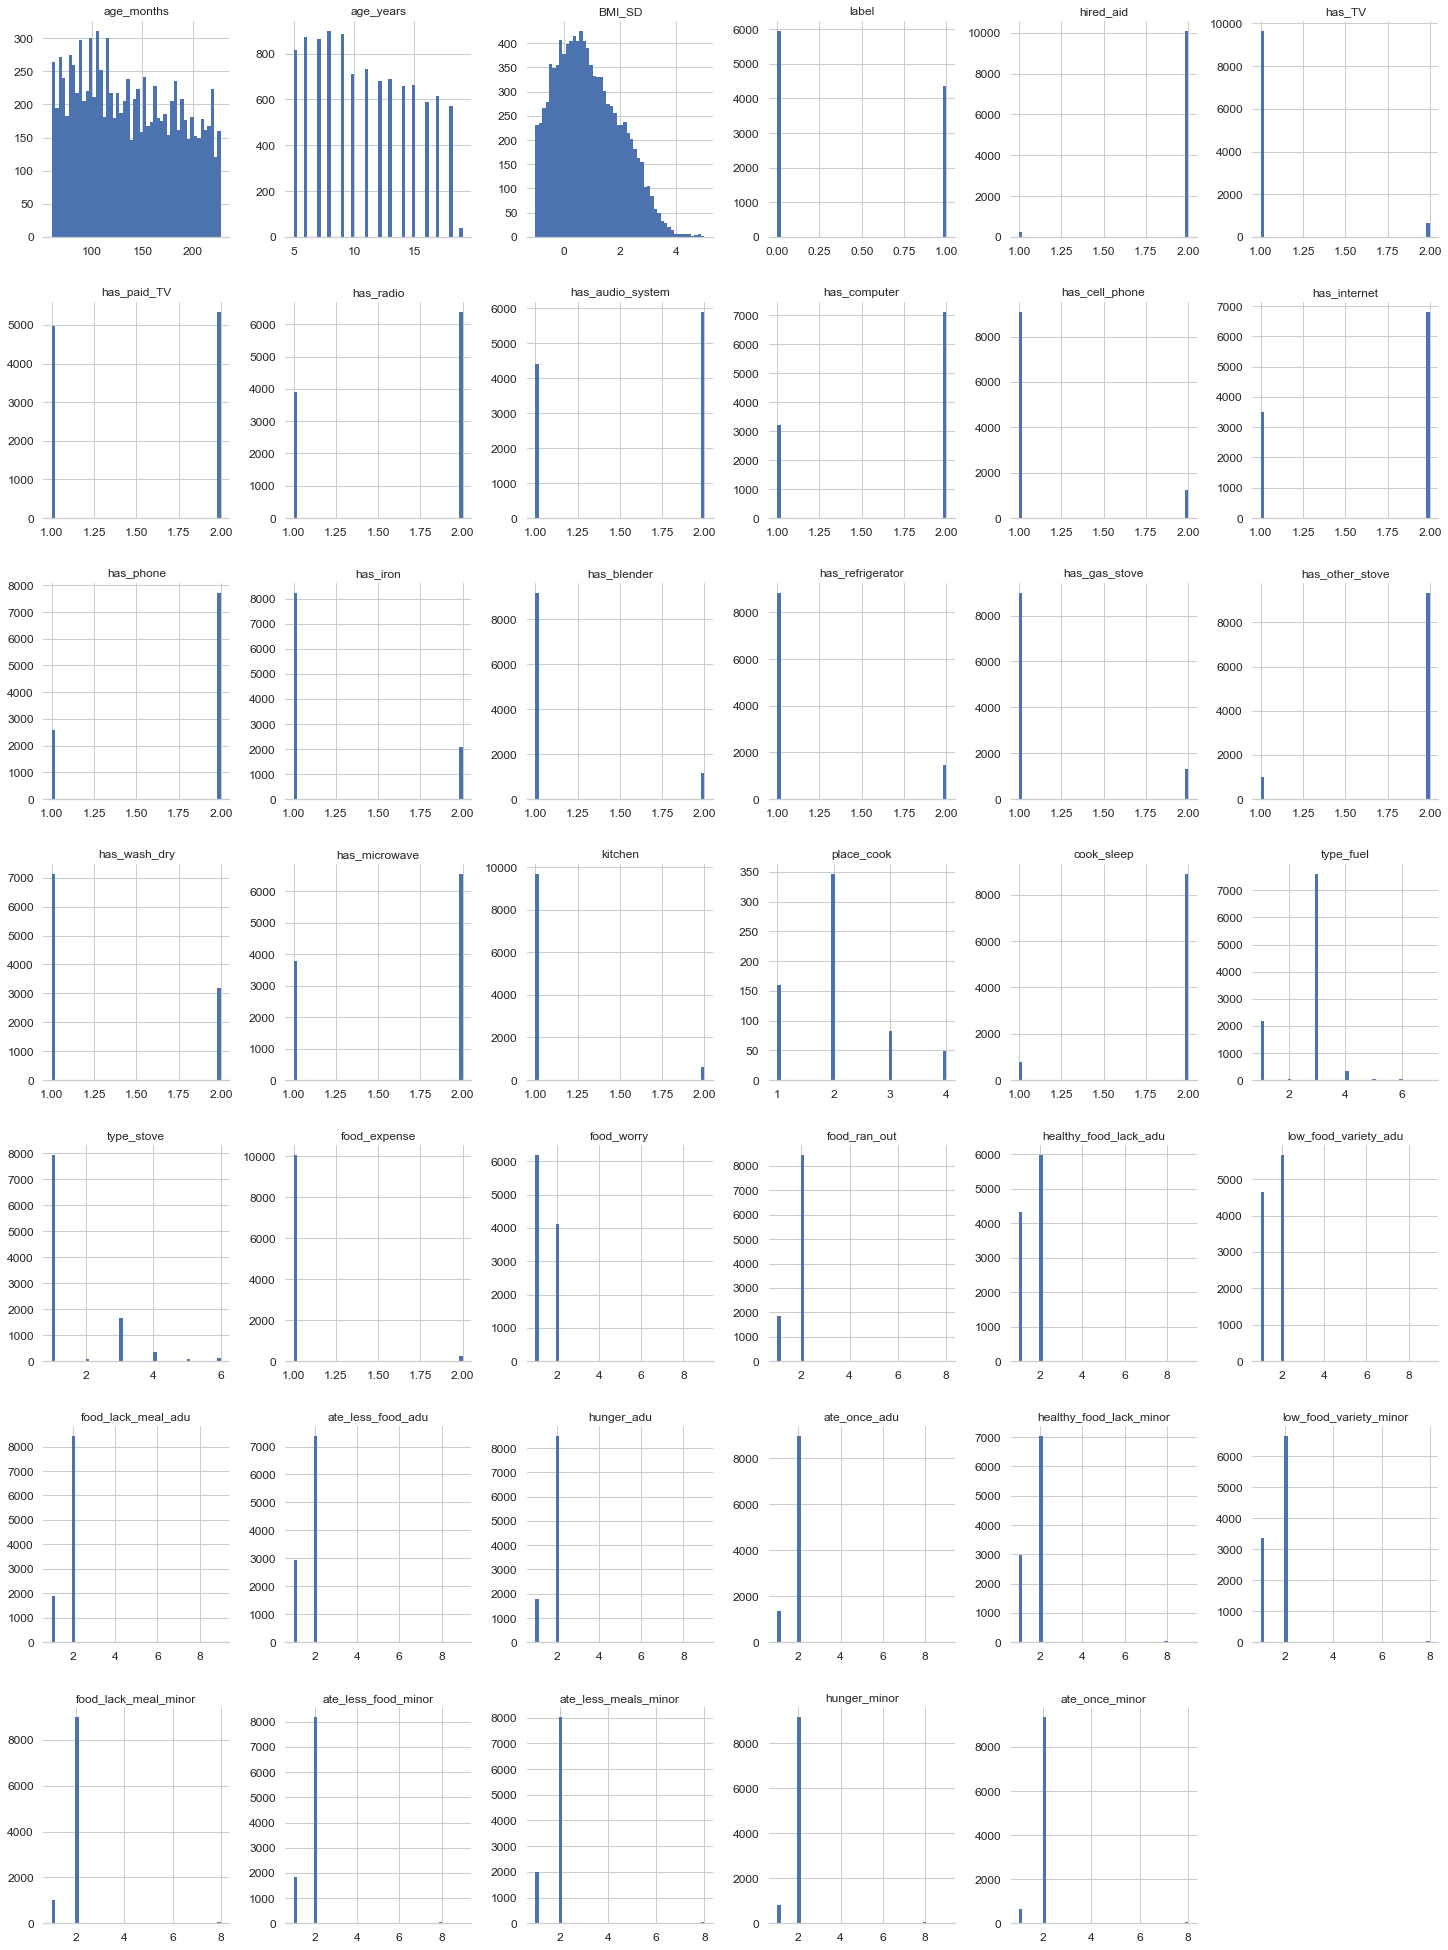

In [167]:
%matplotlib inline
import matplotlib.pyplot as plt
m1_dataset.hist(bins=50,figsize=(25,35))
plt.show()

## Feature Engineering
Some transformations are convenient to reduce the dimensionality, such as:
- Transform "No":2 to "No":0 
- Create one column for the place in the house for cooking
- Create dummy variables of categorical features

In [168]:
# Transform features were 2:No
m1_dataset.loc[m1_dataset.hired_aid == 2, "hired_aid"] = 0
m1_dataset.loc[m1_dataset.has_TV == 2, "has_TV"] = 0
m1_dataset.loc[m1_dataset.has_paid_TV == 2, "has_paid_TV"] = 0
m1_dataset.loc[m1_dataset.has_radio == 2, "has_radio"] = 0
m1_dataset.loc[m1_dataset.has_audio_system == 2, "has_audio_system"] = 0
m1_dataset.loc[m1_dataset.has_computer == 2, "has_computer"] = 0
m1_dataset.loc[m1_dataset.has_cell_phone == 2, "has_cell_phone"] = 0
m1_dataset.loc[m1_dataset.has_internet == 2, "has_internet"] = 0
m1_dataset.loc[m1_dataset.has_phone == 2, "has_phone"] = 0
m1_dataset.loc[m1_dataset.has_iron == 2, "has_iron"] = 0
m1_dataset.loc[m1_dataset.has_blender == 2, "has_blender"] = 0
m1_dataset.loc[m1_dataset.has_refrigerator == 2, "has_refrigerator"] = 0
m1_dataset.loc[m1_dataset.has_gas_stove == 2, "has_gas_stove"] = 0
m1_dataset.loc[m1_dataset.has_other_stove == 2, "has_other_stove"] = 0
m1_dataset.loc[m1_dataset.has_wash_dry == 2, "has_wash_dry"] = 0
m1_dataset.loc[m1_dataset.has_microwave == 2, "has_microwave"] = 0
m1_dataset.loc[m1_dataset.food_expense == 2, "food_expense"] = 0
m1_dataset.loc[m1_dataset.cook_sleep == 2, "cook_sleep"] = 0

# Transform features were 2:No and another answer is NaN
m1_dataset.loc[m1_dataset.food_worry == 2, "food_worry"] = 0
m1_dataset.loc[m1_dataset.food_worry == 8, "food_worry"] = np.nan
m1_dataset.loc[m1_dataset.food_worry == 9, "food_worry"] = np.nan

m1_dataset.loc[m1_dataset.food_ran_out == 2, "food_ran_out"] = 0
m1_dataset.loc[m1_dataset.food_ran_out == 8, "food_ran_out"] = np.nan
m1_dataset.loc[m1_dataset.food_ran_out == 9, "food_ran_out"] = np.nan

m1_dataset.loc[m1_dataset.healthy_food_lack_adu == 2, "healthy_food_lack_adu"] = 0
m1_dataset.loc[m1_dataset.healthy_food_lack_adu == 8, "healthy_food_lack_adu"] = np.nan
m1_dataset.loc[m1_dataset.healthy_food_lack_adu == 9, "healthy_food_lack_adu"] = np.nan

m1_dataset.loc[m1_dataset.low_food_variety_adu == 2, "low_food_variety_adu"] = 0
m1_dataset.loc[m1_dataset.low_food_variety_adu == 8, "low_food_variety_adu"] = np.nan
m1_dataset.loc[m1_dataset.low_food_variety_adu == 9, "low_food_variety_adu"] = np.nan

m1_dataset.loc[m1_dataset.food_lack_meal_adu == 2, "food_lack_meal_adu"] = 0
m1_dataset.loc[m1_dataset.food_lack_meal_adu == 8, "food_lack_meal_adu"] = np.nan
m1_dataset.loc[m1_dataset.food_lack_meal_adu == 9, "food_lack_meal_adu"] = np.nan

m1_dataset.loc[m1_dataset.ate_less_food_adu == 2, "ate_less_food_adu"] = 0
m1_dataset.loc[m1_dataset.ate_less_food_adu == 8, "ate_less_food_adu"] = np.nan
m1_dataset.loc[m1_dataset.ate_less_food_adu == 9, "ate_less_food_adu"] = np.nan

m1_dataset.loc[m1_dataset.hunger_adu == 2, "hunger_adu"] = 0
m1_dataset.loc[m1_dataset.hunger_adu == 8, "hunger_adu"] = np.nan
m1_dataset.loc[m1_dataset.hunger_adu == 9, "hunger_adu"] = np.nan

m1_dataset.loc[m1_dataset.ate_once_adu == 2, "ate_once_adu"] = 0
m1_dataset.loc[m1_dataset.ate_once_adu == 8, "ate_once_adu"] = np.nan
m1_dataset.loc[m1_dataset.ate_once_adu == 9, "ate_once_adu"] = np.nan

m1_dataset.loc[m1_dataset.healthy_food_lack_minor == 2, "healthy_food_lack_minor"] = 0
m1_dataset.loc[m1_dataset.healthy_food_lack_minor == 8, "healthy_food_lack_minor"] = np.nan
m1_dataset.loc[m1_dataset.healthy_food_lack_minor == 9, "healthy_food_lack_minor"] = np.nan

m1_dataset.loc[m1_dataset.low_food_variety_minor == 2, "low_food_variety_minor"] = 0
m1_dataset.loc[m1_dataset.low_food_variety_minor == 8, "low_food_variety_minor"] = np.nan
m1_dataset.loc[m1_dataset.low_food_variety_minor == 9, "low_food_variety_minor"] = np.nan

m1_dataset.loc[m1_dataset.food_lack_meal_minor == 2, "food_lack_meal_minor"] = 0
m1_dataset.loc[m1_dataset.food_lack_meal_minor == 8, "food_lack_meal_minor"] = np.nan
m1_dataset.loc[m1_dataset.food_lack_meal_minor == 9, "food_lack_meal_minor"] = np.nan

m1_dataset.loc[m1_dataset.ate_less_food_minor == 2, "ate_less_food_minor"] = 0
m1_dataset.loc[m1_dataset.ate_less_food_minor == 8, "ate_less_food_minor"] = np.nan
m1_dataset.loc[m1_dataset.ate_less_food_minor == 9, "ate_less_food_minor"] = np.nan

m1_dataset.loc[m1_dataset.ate_less_meals_minor == 2, "ate_less_meals_minor"] = 0
m1_dataset.loc[m1_dataset.ate_less_meals_minor == 8, "ate_less_meals_minor"] = np.nan
m1_dataset.loc[m1_dataset.ate_less_meals_minor == 9, "ate_less_meals_minor"] = np.nan

m1_dataset.loc[m1_dataset.hunger_minor == 2, "hunger_minor"] = 0
m1_dataset.loc[m1_dataset.hunger_minor == 8, "hunger_minor"] = np.nan
m1_dataset.loc[m1_dataset.hunger_minor == 9, "hunger_minor"] = np.nan

m1_dataset.loc[m1_dataset.ate_once_minor == 2, "ate_once_minor"] = 0
m1_dataset.loc[m1_dataset.ate_once_minor == 8, "ate_once_minor"] = np.nan
m1_dataset.loc[m1_dataset.ate_once_minor == 9, "ate_once_minor"] = np.nan

In [169]:
m1_dataset.max(axis=0).head(60)

house_ID                                  99_4
household_ID                            99_4_1
person_ID                             99_4_1_3
region                                   South
strata                              4th_strata
locality_type                            urban
locality_size                         >100,000
age_months                                 228
age_years                                   19
sex                                       male
BMI_SD                                4.992296
label_cat                  Overweight or Obese
label                                        1
hired_aid                                    1
has_TV                                       1
has_paid_TV                                  1
has_radio                                    1
has_audio_system                             1
has_computer                                 1
has_cell_phone                               1
has_internet                                 1
has_phone    

### Create one column for the place in the house for cooking

In [170]:
def merge_cooking_place(row):
    if (row["kitchen"] == 1):
        return "kitchen"
    if (row["kitchen"] == 2):
        if (row["place_cook"] == 1):
            return "in a hallway"
        if (row["place_cook"] == 2):
            return "outdoor shack or tejaban"
        if (row["place_cook"] == 3):
            return "outdoors"
        if (row["place_cook"] == 4):
            return "the household does not cook"
    else:
        return np.nan

In [171]:
m1_dataset["cooking_room"] = m1_dataset.apply(lambda row: merge_cooking_place(row), axis=1)
del m1_dataset["place_cook"]
del m1_dataset["kitchen"]
m1_dataset["cooking_room"].value_counts()

kitchen                        9664
outdoor shack or tejaban        346
in a hallway                    160
outdoors                         82
the household does not cook      49
Name: cooking_room, dtype: int64

### Check NaN values

In [172]:
percent_missing = m1_dataset.isnull().mean()*100
missing_values = pd.DataFrame({'column_name':m1_dataset.columns, 
                               'percent_missing':percent_missing})
missing_values.sort_values('percent_missing', inplace=True, ascending=False)
missing_values.head(20)

,column_name,percent_missing
cook_sleep,cook_sleep,6.183866
hunger_minor,hunger_minor,2.960878
healthy_food_lack_minor,healthy_food_lack_minor,2.960878
ate_once_minor,ate_once_minor,2.941462
ate_less_food_minor,ate_less_food_minor,2.931754
food_lack_meal_minor,food_lack_meal_minor,2.931754
ate_less_meals_minor,ate_less_meals_minor,2.922046
low_food_variety_minor,low_food_variety_minor,2.912339
type_stove,type_stove,0.563052
type_fuel,type_fuel,0.475682


No need to drop any columns since all have less than 35% of missing values. 

### Check correlations

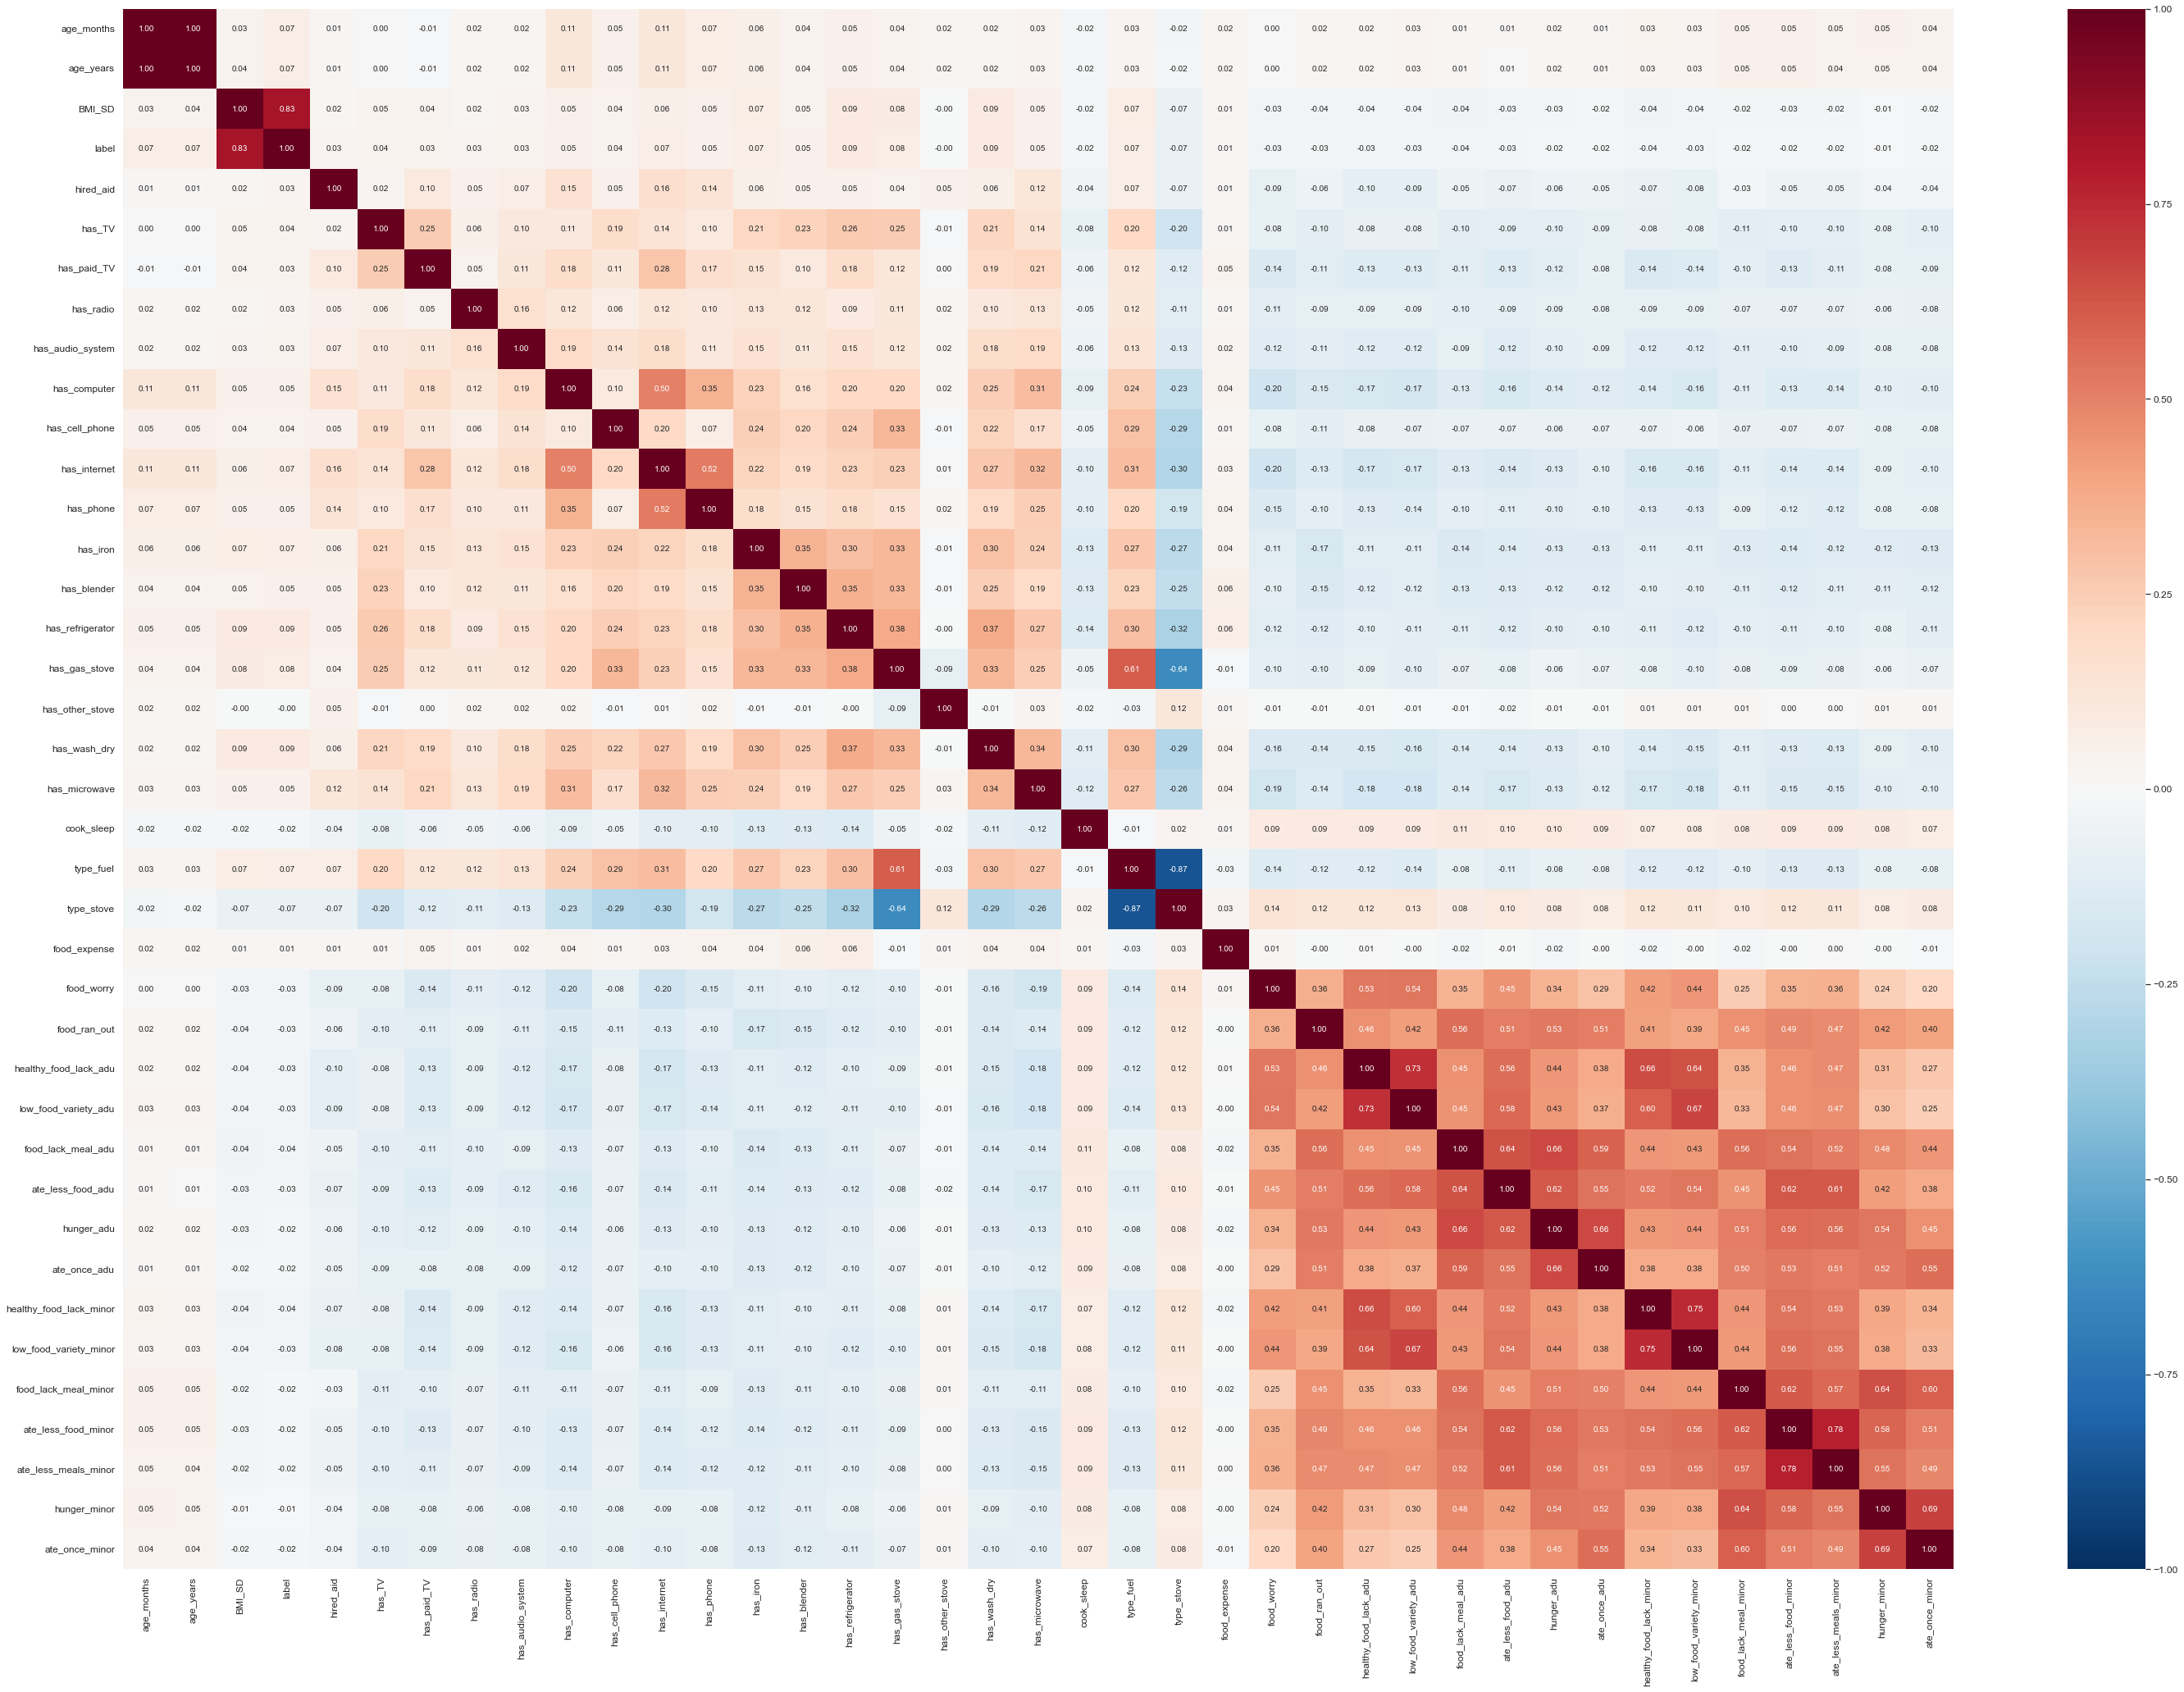

In [173]:
# Plot correlation matrix
fig, ax = plt.subplots(figsize=(50,35))
ax = heatmap(m1_dataset.corr(), fmt=".2f", annot=True, ax=ax, cmap="RdBu_r", vmin=-1, vmax=1)

There are many correlations in the questionnaire on Food Safety. This happensa because the variables are all part of the Latinoamerican and Caribean Food Security Scale (ELCSA: "Escala Latinoamericana y Caribeña de Seguridad Alimentaria"). Therefore, to avoid multi-collinearity, the variables will be computed in accordance of the criteria of ELCSA, which is counted by the number of positive answers in the following way:
- For households with members less than 18 years old
    - Food safety: 0 positive answers
    - Mild insecurity: 1-5 positive answers
    - Moderate insecurity: 6-10 positive answers
    - Severe insecurity: 11-15 positive answers
- For households without members less than 18 years old
    - Food safety: 0 positive answers
    - Mild insecurity: 1-3 positive answers
    - Moderate insecurity: 4-6 positive answers
    - Severe insecurity: 7-8 positive answers

In [174]:
# Define columns to sum (ELCSA items)
elcsa_items = ["food_worry","food_ran_out","healthy_food_lack_adu","low_food_variety_adu", "food_lack_meal_adu",
                    "ate_less_food_adu","hunger_adu","ate_once_adu",
                    "healthy_food_lack_minor","low_food_variety_minor","food_lack_meal_minor","ate_less_food_minor",
                    "ate_less_meals_minor","hunger_minor","ate_once_minor"]

# Sum the number of answered columns
m1_dataset["num_answers"] = m1_dataset[elcsa_items].count(axis=1)

In [175]:
m1_dataset["num_answers"].value_counts()

15    9923
8      292
14      72
7        6
13       4
10       2
0        2
Name: num_answers, dtype: int64

Only rows with value counts 8 (household without a minor) or 15 (household with minor) will be kept since the rest contain NaN values.

In [176]:
m1_dataset.loc[m1_dataset["num_answers"] == 7, "num_answers"] = np.nan
m1_dataset.loc[m1_dataset["num_answers"] == 10, "num_answers"] = np.nan
m1_dataset.loc[m1_dataset["num_answers"] == 13, "num_answers"] = np.nan
m1_dataset.loc[m1_dataset["num_answers"] == 14, "num_answers"] = np.nan

In [177]:
m1_dataset["num_answers"].value_counts()

15.0    9923
8.0      292
0.0        2
Name: num_answers, dtype: int64

In [178]:
# Define columns to sum according to age of the child or adolescent
sum_col_minor = ["food_worry","food_ran_out","healthy_food_lack_adu","low_food_variety_adu", "food_lack_meal_adu",
                    "ate_less_food_adu","hunger_adu","ate_once_adu",
                    "healthy_food_lack_minor","low_food_variety_minor","food_lack_meal_minor","ate_less_food_minor",
                    "ate_less_meals_minor","hunger_minor","ate_once_minor"]
sum_col_no_minor = ["food_worry","food_ran_out","healthy_food_lack_adu","low_food_variety_adu", "food_lack_meal_adu",
                    "ate_less_food_adu","hunger_adu","ate_once_adu"] 

m1_dataset["sum_answers_minor"] = m1_dataset[sum_col_minor].sum(axis=1).where(m1_dataset['num_answers'] == 15, 0)
m1_dataset["sum_answers_no_minor"] = m1_dataset[sum_col_no_minor].sum(axis=1).where(m1_dataset['num_answers'] == 8, 0)

In [179]:
m1_dataset.loc[m1_dataset.num_answers == 8]

,house_ID,household_ID,person_ID,region,strata,locality_type,locality_size,age_months,age_years,sex,...,low_food_variety_minor,food_lack_meal_minor,ate_less_food_minor,ate_less_meals_minor,hunger_minor,ate_once_minor,cooking_room,num_answers,sum_answers_minor,sum_answers_no_minor
36,37_3,37_3_1,37_3_1_2,Centre,3rd_strata,urban,">100,000",220,18,female,...,NaN,NaN,NaN,NaN,NaN,NaN,kitchen,8.0,0.0,0.0
78,73_1,73_1_1,73_1_1_3,Centre,2nd_strata,urban,">100,000",216,18,female,...,NaN,NaN,NaN,NaN,NaN,NaN,kitchen,8.0,0.0,2.0
94,89_2,89_2_1,89_2_1_5,Centre,3rd_strata,urban,">100,000",220,18,male,...,NaN,NaN,NaN,NaN,NaN,NaN,kitchen,8.0,0.0,0.0
122,103_4,103_4_1,103_4_1_2,Centre,2nd_strata,urban,">100,000",224,18,male,...,NaN,NaN,NaN,NaN,NaN,NaN,kitchen,8.0,0.0,0.0
156,120_1,120_1_1,120_1_1_4,Centre,3rd_strata,urban,">100,000",221,18,female,...,NaN,NaN,NaN,NaN,NaN,NaN,kitchen,8.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10068,3916_2,3916_2_1,3916_2_1_3,Centre,2nd_strata,urban,"2,500-14,999",218,18,female,...,NaN,NaN,NaN,NaN,NaN,NaN,kitchen,8.0,0.0,2.0
10181,3927_11,3927_11_1,3927_11_1_5,Centre,1st_strata,rural,"<2,500",220,18,male,...,NaN,NaN,NaN,NaN,NaN,NaN,kitchen,8.0,0.0,0.0
10251,3933_6,3933_6_1,3933_6_1_2,Centre,1st_strata,rural,"<2,500",109,9,male,...,NaN,NaN,NaN,NaN,NaN,NaN,kitchen,8.0,0.0,6.0
10267,3935_6,3935_6_1,3935_6_1_4,Centre,2nd_strata,rural,"<2,500",219,18,male,...,NaN,NaN,NaN,NaN,NaN,NaN,kitchen,8.0,0.0,0.0


In [180]:
# Function to sum the column with the sum of answers
def calculate_result_elcsa(row):
    if row["num_answers"] == 8.0:       # household without minors
        if row["sum_answers_no_minor"] == 0:
            return "Food safety"
        if row["sum_answers_no_minor"] >= 1 and row["sum_answers_no_minor"] <= 3:
            return "Mild insecurity"
        if row["sum_answers_no_minor"] >= 4 and row["sum_answers_no_minor"] <= 6:
            return "Moderate insecurity"
        if row["sum_answers_no_minor"] >= 7 and row["sum_answers_no_minor"] <= 8:
            return "Severe insecurity"

    if row["num_answers"] == 15.0:       # household with minors
        if row["sum_answers_no_minor"] == 0:
            return "Food safety"
        if row["sum_answers_no_minor"] >= 1 and row["sum_answers_no_minor"] <= 5:
            return "Mild insecurity"
        if row["sum_answers_no_minor"] >= 6 and row["sum_answers_no_minor"] <= 10:
            return "Moderate insecurity"
        if row["sum_answers_no_minor"] >= 11 and row["sum_answers_no_minor"] <= 15:
            return "Severe insecurity"
    else:
        return np.nan

In [181]:
m1_dataset["result_elcsa"] = m1_dataset.apply(lambda row: calculate_result_elcsa(row), axis=1)

In [182]:
m1_dataset["result_elcsa"].value_counts()

Food safety            10051
Mild insecurity           87
Moderate insecurity       47
Severe insecurity         30
Name: result_elcsa, dtype: int64

Now we can delete all the unnecessary columns. 

In [183]:
m1_dataset.shape

(10301, 53)

In [184]:
m1_dataset = m1_dataset.drop(elcsa_items, axis=1)
m1_dataset = m1_dataset.drop(["num_answers","sum_answers_minor","sum_answers_no_minor"], axis=1)
m1_dataset.shape

(10301, 35)

### Check correlations again

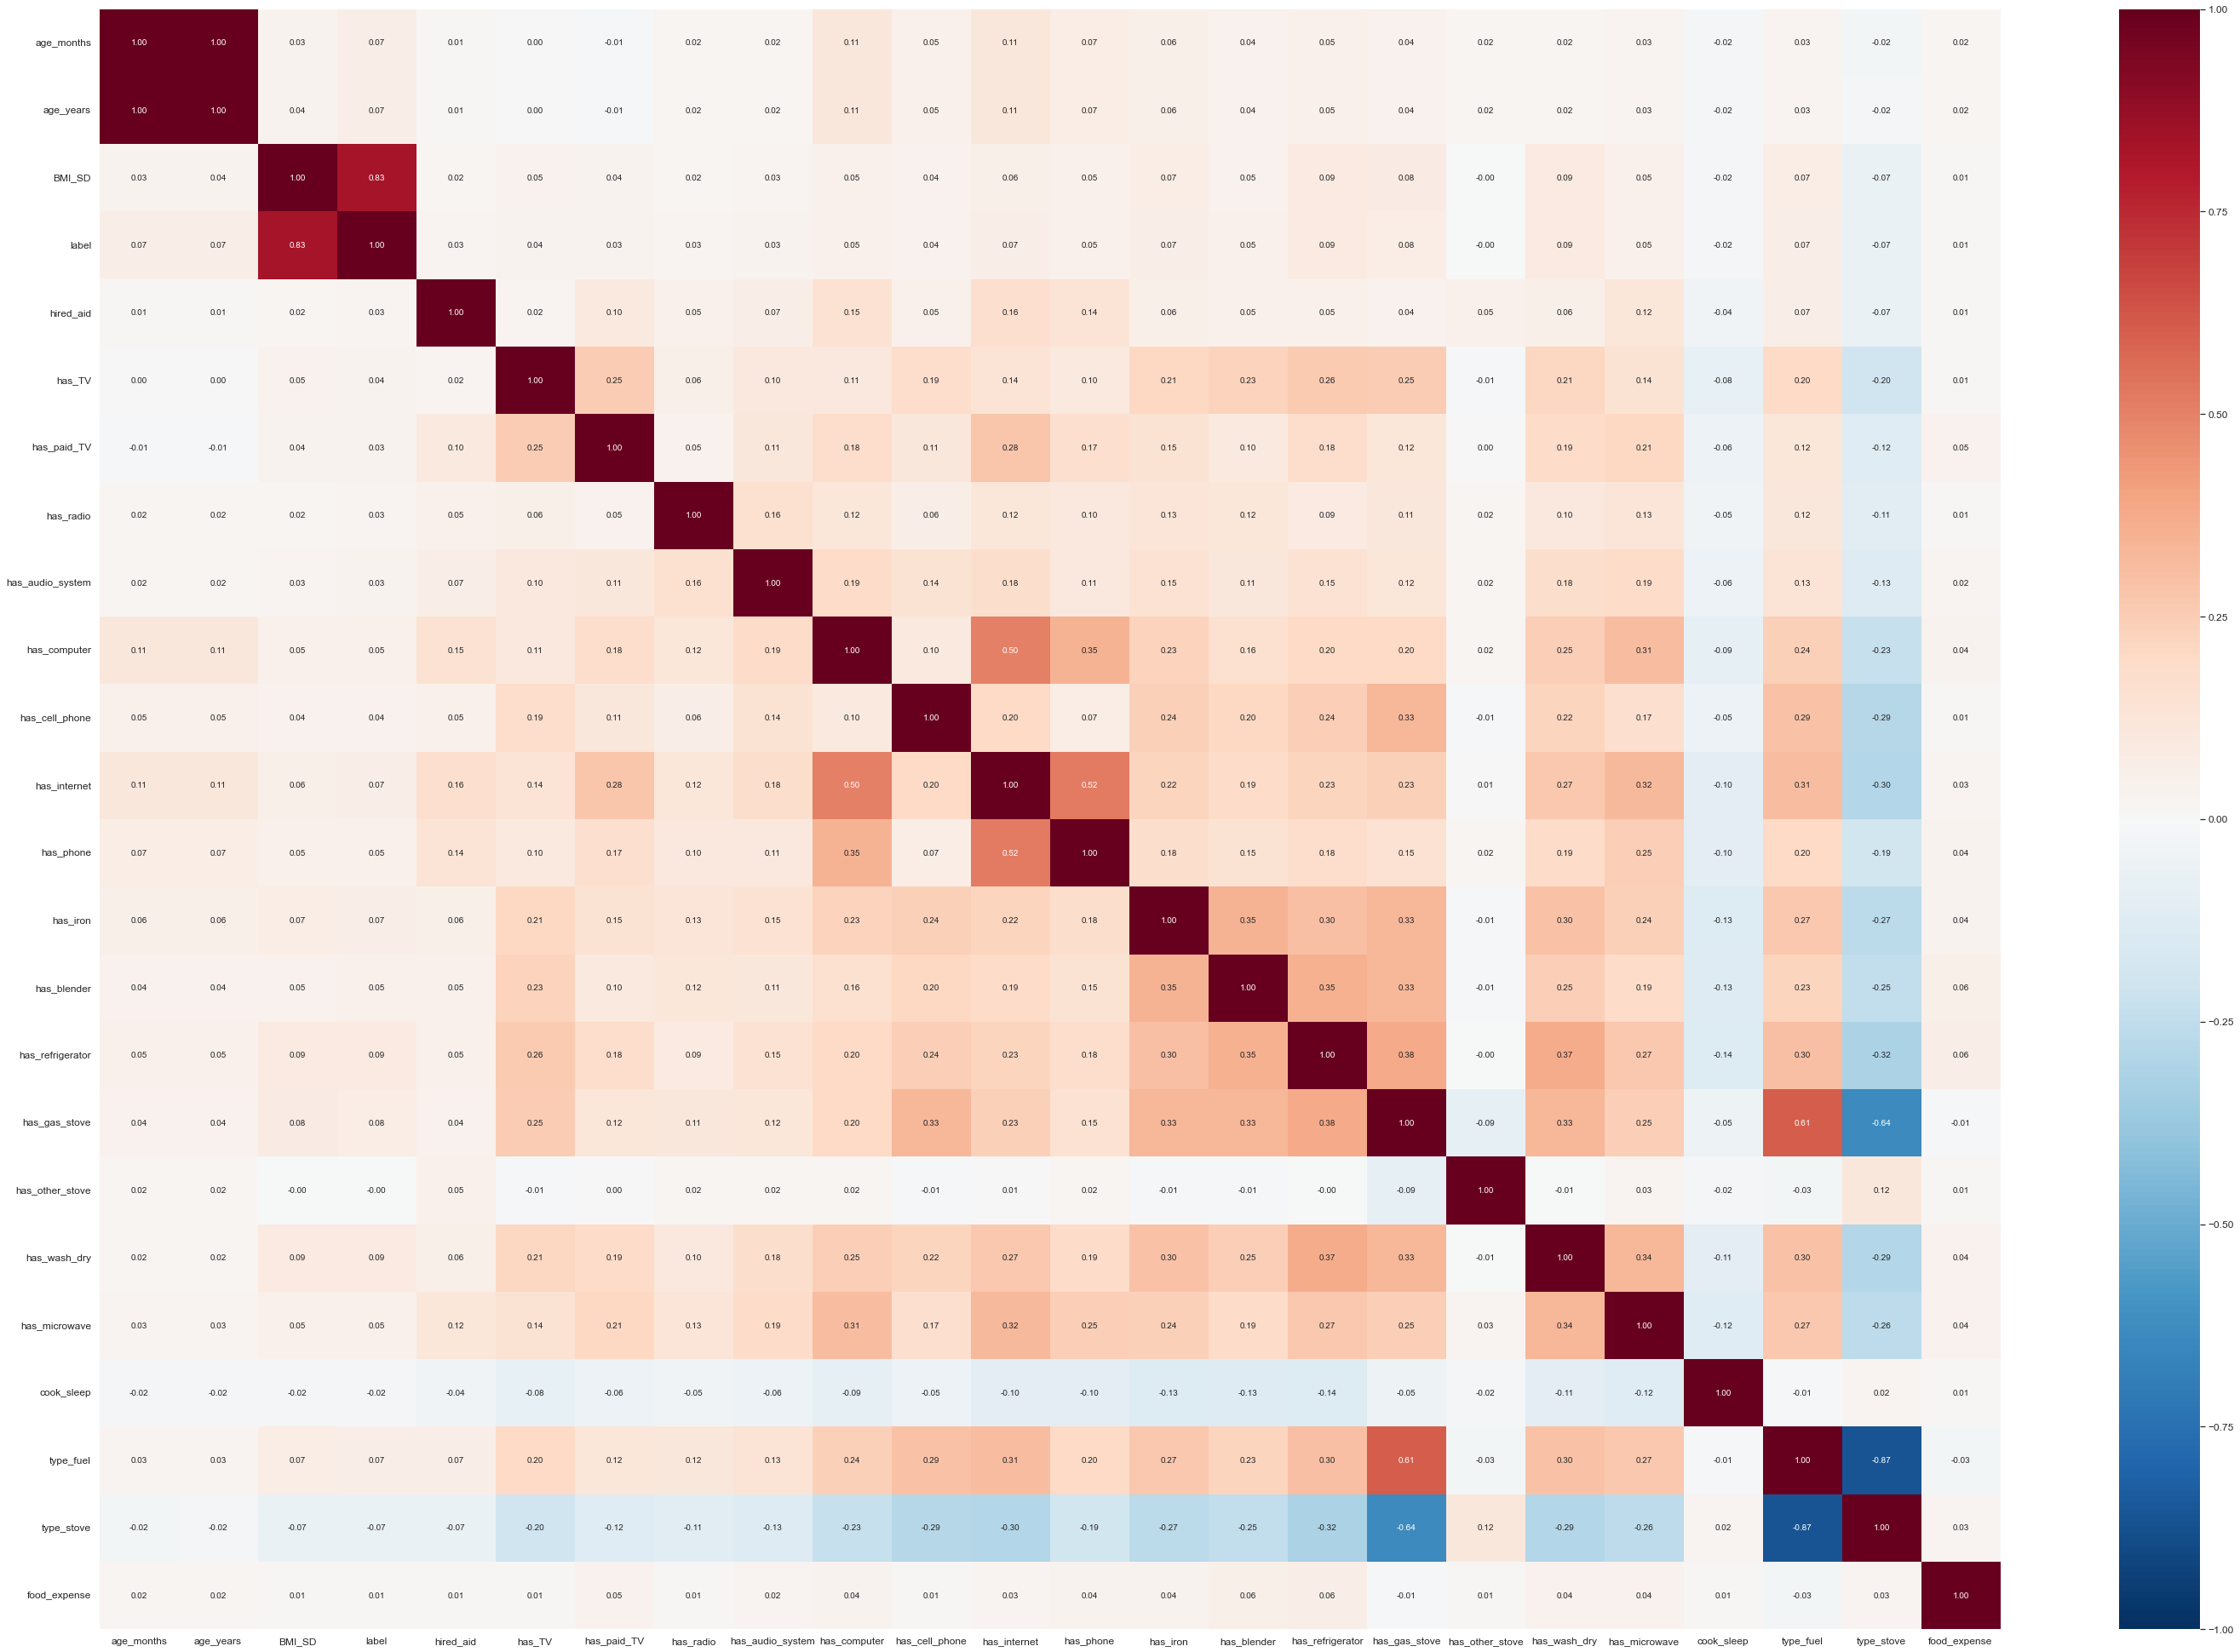

In [185]:
# Plot correlation matrix
fig, ax = plt.subplots(figsize=(50,35))
ax = heatmap(m1_dataset.corr(), fmt=".2f", annot=True, ax=ax, cmap="RdBu_r", vmin=-1, vmax=1)

Another two variables are causing multi-collinearity with the question answering if the house has a gas stove: type_fuel and type_stove. Those two will be removed. 

In [186]:
del m1_dataset["type_fuel"]
del m1_dataset["type_stove"]
m1_dataset.shape

(10301, 33)

## Export CSV for unimodal supervised and unsupervised approaches

In [187]:
# Create copy
m1_unimodal = m1_dataset.copy()

# See info
m1_unimodal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10301 entries, 0 to 10300
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   house_ID          10301 non-null  object 
 1   household_ID      10301 non-null  object 
 2   person_ID         10301 non-null  object 
 3   region            10301 non-null  object 
 4   strata            10301 non-null  object 
 5   locality_type     10301 non-null  object 
 6   locality_size     10301 non-null  object 
 7   age_months        10301 non-null  int64  
 8   age_years         10301 non-null  int64  
 9   sex               10301 non-null  object 
 10  BMI_SD            10301 non-null  float64
 11  label_cat         10301 non-null  object 
 12  label             10301 non-null  int64  
 13  hired_aid         10301 non-null  int64  
 14  has_TV            10301 non-null  int64  
 15  has_paid_TV       10301 non-null  int64  
 16  has_radio         10301 non-null  int64 

In [188]:
# Export unimodal csv
m1_unimodal.to_csv(os.path.join(output_path,'m1_unimodal.csv'), index=None, header=True)

## Data preparation

### Merge based on sample dataset key
This was already done.

### Check for missing values

Since no dimensions had more than 35% missing values, all rows with NaN values will be removed.

In [189]:
# Drop all rows with at least one NaN value.
m1_dataset = m1_dataset.dropna()
m1_dataset.shape

(9585, 33)

### Check label distribution

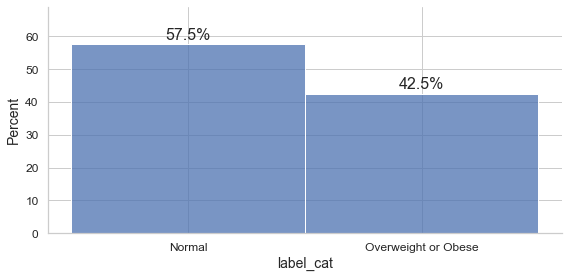

In [190]:
binary_SD_dist = sns.displot(data=m1_dataset, x="label_cat", 
                       height=4, aspect=2, stat="percent")

show_label_percent(binary_SD_dist)

plt.show()

## Group setup for LOGO CV

### Create random groups for the Leave-One-Group-Out Cross-Validation

In [191]:
# Reset index
m1_dataset.reset_index(drop=True, inplace=True)

# Create fair random groups from 1 to 5 as a numpy array and convert it into DataFrame
random_groups = np.random.uniform(1,6,size=len(m1_dataset))
random_groups = pd.DataFrame(random_groups.astype(int))

# Assign group dataframe into column "group"
m1_dataset["group"] = random_groups
m1_dataset

,house_ID,household_ID,person_ID,region,strata,locality_type,locality_size,age_months,age_years,sex,...,has_refrigerator,has_gas_stove,has_other_stove,has_wash_dry,has_microwave,cook_sleep,food_expense,cooking_room,result_elcsa,group
0,1_4,1_4_1,1_4_1_8,Centre,3rd_strata,urban,">100,000",122,10,female,...,1,1,0,1,1,0.0,1,kitchen,Food safety,3
1,3_2,3_2_1,3_2_1_5,Centre,2nd_strata,urban,">100,000",149,12,female,...,1,1,0,1,0,0.0,1,kitchen,Food safety,3
2,4_1,4_1_1,4_1_1_4,Centre,2nd_strata,urban,">100,000",162,13,male,...,1,1,0,1,0,0.0,1,kitchen,Food safety,4
3,4_3,4_3_1,4_3_1_5,Centre,2nd_strata,urban,">100,000",197,16,male,...,1,1,1,0,0,0.0,1,kitchen,Food safety,3
4,4_5,4_5_1,4_5_1_5,Centre,2nd_strata,urban,">100,000",169,14,male,...,1,1,0,1,1,0.0,1,kitchen,Food safety,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9580,3938_17,3938_17_1,3938_17_1_3,Centre,2nd_strata,rural,"<2,500",130,10,male,...,1,1,0,1,1,0.0,1,kitchen,Food safety,5
9581,3938_17,3938_17_1,3938_17_1_4,Centre,2nd_strata,rural,"<2,500",119,9,female,...,1,1,0,1,1,0.0,1,kitchen,Food safety,3
9582,3938_19,3938_19_1,3938_19_1_3,Centre,2nd_strata,rural,"<2,500",170,14,male,...,1,1,1,1,0,0.0,1,kitchen,Food safety,3
9583,3938_19,3938_19_1,3938_19_1_5,Centre,2nd_strata,rural,"<2,500",89,7,female,...,1,1,1,1,0,0.0,1,kitchen,Food safety,4


In [192]:
# Verify size, NaN and Dtype of everything
m1_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9585 entries, 0 to 9584
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   house_ID          9585 non-null   object 
 1   household_ID      9585 non-null   object 
 2   person_ID         9585 non-null   object 
 3   region            9585 non-null   object 
 4   strata            9585 non-null   object 
 5   locality_type     9585 non-null   object 
 6   locality_size     9585 non-null   object 
 7   age_months        9585 non-null   int64  
 8   age_years         9585 non-null   int64  
 9   sex               9585 non-null   object 
 10  BMI_SD            9585 non-null   float64
 11  label_cat         9585 non-null   object 
 12  label             9585 non-null   int64  
 13  hired_aid         9585 non-null   int64  
 14  has_TV            9585 non-null   int64  
 15  has_paid_TV       9585 non-null   int64  
 16  has_radio         9585 non-null   int64  


### Check group representation

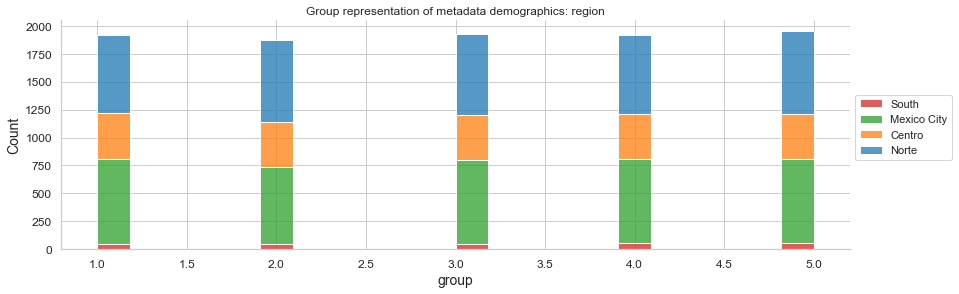

In [193]:
# Plot distributions to see representation of demographics in the groups
group_region = sns.displot(data=m1_dataset, x="group", hue="region", multiple="stack", palette="tab10",
                       height=4, aspect=3, legend=False).set(title="""Group representation of metadata demographics: region""")
plt.legend(loc=2,bbox_to_anchor = (1,0.7),labels=['South', 'Mexico City', 'Centro', 'Norte'])
plt.show(group_region)

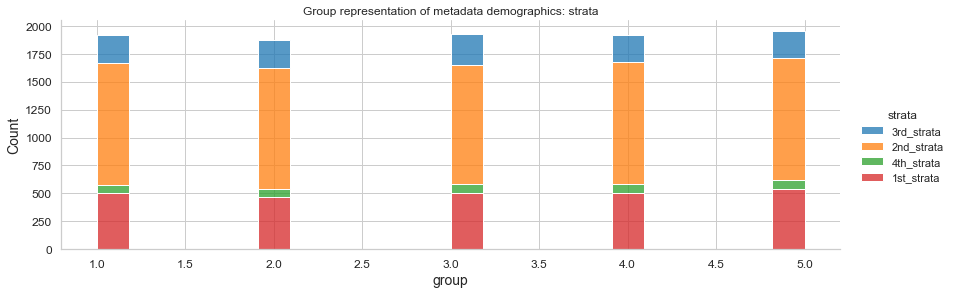

In [194]:
group_strata = sns.displot(data=m1_dataset, x="group", hue="strata", multiple="stack", palette="tab10",
                       height=4, aspect=3).set(title="""Group representation of metadata demographics: strata""")

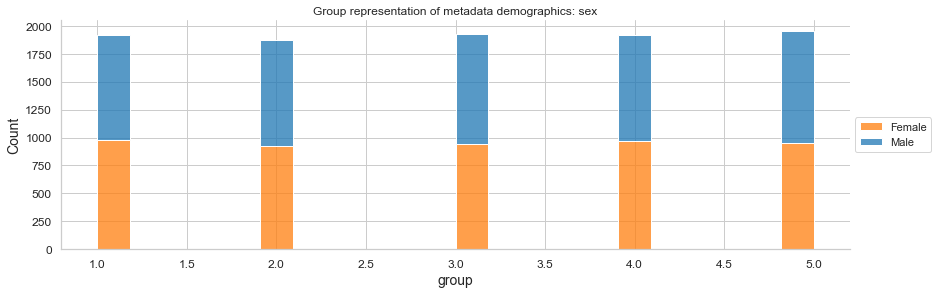

In [195]:
group_sex = sns.displot(data=m1_dataset, x="group", hue="sex", multiple="stack", palette="tab10",
                       height=4, aspect=3, legend=False).set(title="""Group representation of metadata demographics: sex""")
plt.legend(loc=2,bbox_to_anchor = (1,0.6),labels=['Female','Male'])
plt.show(group_sex)

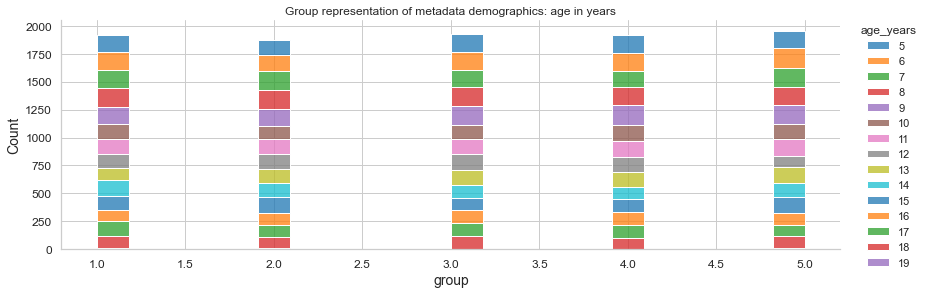

In [196]:
group_age_years = sns.displot(data=m1_dataset, x="group", hue="age_years", multiple="stack", palette="tab10",
                       height=4, aspect=3).set(title="""Group representation of metadata demographics: age in years""")

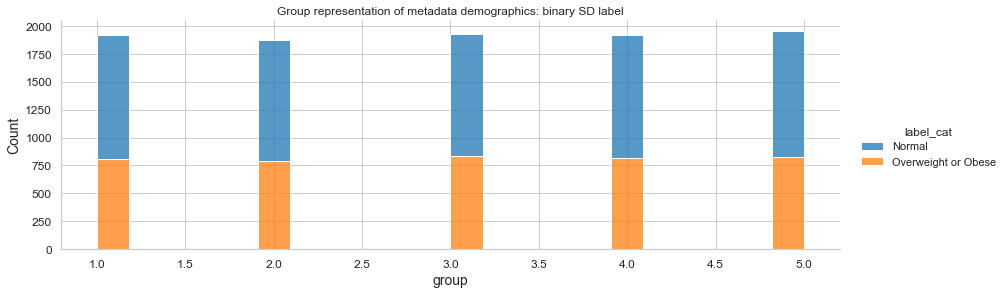

In [197]:
group_binary_SD_label = sns.displot(data=m1_dataset, x="group", hue="label_cat", multiple="stack", palette="tab10",
                       height=4, aspect=3).set(title="""Group representation of metadata demographics: binary SD label""")
plt.show(group_binary_SD_label)

### Remove metadata

In [198]:
# Remove unnecesary metadata keeping only the binary_SD_label
m1_dataset = m1_dataset.drop(columns=["house_ID","household_ID","person_ID",
                                      "sex","age_months","age_years","BMI_SD","label_cat"])
m1_dataset.columns.tolist()

['region',
 'strata',
 'locality_type',
 'locality_size',
 'label',
 'hired_aid',
 'has_TV',
 'has_paid_TV',
 'has_radio',
 'has_audio_system',
 'has_computer',
 'has_cell_phone',
 'has_internet',
 'has_phone',
 'has_iron',
 'has_blender',
 'has_refrigerator',
 'has_gas_stove',
 'has_other_stove',
 'has_wash_dry',
 'has_microwave',
 'cook_sleep',
 'food_expense',
 'cooking_room',
 'result_elcsa',
 'group']

## Feature scaling
Since the data does not follow a Gausian distribution, the features will be standardized instead of normalized. 

### Create dummy variables of categorical features

In [199]:
# Identify categorical variables
m1_dataset.select_dtypes(include='object')

,region,strata,locality_type,locality_size,cooking_room,result_elcsa
0,Centre,3rd_strata,urban,">100,000",kitchen,Food safety
1,Centre,2nd_strata,urban,">100,000",kitchen,Food safety
2,Centre,2nd_strata,urban,">100,000",kitchen,Food safety
3,Centre,2nd_strata,urban,">100,000",kitchen,Food safety
4,Centre,2nd_strata,urban,">100,000",kitchen,Food safety
...,...,...,...,...,...,...
9580,Centre,2nd_strata,rural,"<2,500",kitchen,Food safety
9581,Centre,2nd_strata,rural,"<2,500",kitchen,Food safety
9582,Centre,2nd_strata,rural,"<2,500",kitchen,Food safety
9583,Centre,2nd_strata,rural,"<2,500",kitchen,Food safety


Categorical values:
- cooking_room
- result_elcsa
- region
- strata
- locality_type
- locality_size

### Create dummy variables

In [200]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Separate metadata
metadata_df = m1_dataset[["label","group"]]
X = m1_dataset.drop(columns=["label","group"])

# Set and fit the OneHotEncoder
oneHotEncoder = OneHotEncoder(sparse=False)
X_encoded = oneHotEncoder.fit_transform(X[["cooking_room","result_elcsa","region","strata","locality_type","locality_size"]])

# Convert it back into a dataframe
encoded_df = pd.DataFrame(X_encoded, columns=oneHotEncoder.get_feature_names_out())

# Concatenate scaled dataframe and metadata
train_m1_encoded_df = pd.concat([X,encoded_df,metadata_df], axis=1)
train_m1_encoded_df

,region,strata,locality_type,locality_size,hired_aid,has_TV,has_paid_TV,has_radio,has_audio_system,has_computer,...,strata_3rd_strata,strata_4th_strata,locality_type_rural,locality_type_urban,"locality_size_15,000-99,999","locality_size_2,500-14,999","locality_size_<2,500","locality_size_>100,000",label,group
0,Centre,3rd_strata,urban,">100,000",0,1,0,1,1,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,3
1,Centre,2nd_strata,urban,">100,000",0,1,1,1,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,3
2,Centre,2nd_strata,urban,">100,000",0,1,1,1,1,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,4
3,Centre,2nd_strata,urban,">100,000",0,1,0,0,0,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,3
4,Centre,2nd_strata,urban,">100,000",0,1,1,1,1,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9580,Centre,2nd_strata,rural,"<2,500",0,1,1,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,5
9581,Centre,2nd_strata,rural,"<2,500",0,1,1,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,3
9582,Centre,2nd_strata,rural,"<2,500",0,1,1,1,0,1,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1,3
9583,Centre,2nd_strata,rural,"<2,500",0,1,1,1,0,1,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,4


### Verify that everything is binary

In [201]:
train_m1_encoded_df.select_dtypes(include='object')

,region,strata,locality_type,locality_size,cooking_room,result_elcsa
0,Centre,3rd_strata,urban,">100,000",kitchen,Food safety
1,Centre,2nd_strata,urban,">100,000",kitchen,Food safety
2,Centre,2nd_strata,urban,">100,000",kitchen,Food safety
3,Centre,2nd_strata,urban,">100,000",kitchen,Food safety
4,Centre,2nd_strata,urban,">100,000",kitchen,Food safety
...,...,...,...,...,...,...
9580,Centre,2nd_strata,rural,"<2,500",kitchen,Food safety
9581,Centre,2nd_strata,rural,"<2,500",kitchen,Food safety
9582,Centre,2nd_strata,rural,"<2,500",kitchen,Food safety
9583,Centre,2nd_strata,rural,"<2,500",kitchen,Food safety


In [202]:
# Delete object columns
train_m1_encoded_df = train_m1_encoded_df.drop(columns=["cooking_room","result_elcsa","region","strata","locality_type","locality_size"])

In [203]:
train_m1_encoded_df.select_dtypes(include='object')

""
0
1
2
3
4
...
9580
9581
9582
9583


In [204]:
train_m1_encoded_df.max(axis=0).head(60)

hired_aid                           1.0
has_TV                              1.0
has_paid_TV                         1.0
has_radio                           1.0
has_audio_system                    1.0
has_computer                        1.0
has_cell_phone                      1.0
has_internet                        1.0
has_phone                           1.0
has_iron                            1.0
has_blender                         1.0
has_refrigerator                    1.0
has_gas_stove                       1.0
has_other_stove                     1.0
has_wash_dry                        1.0
has_microwave                       1.0
cook_sleep                          1.0
food_expense                        1.0
cooking_room_kitchen                1.0
result_elcsa_Food safety            1.0
result_elcsa_Mild insecurity        1.0
result_elcsa_Moderate insecurity    1.0
result_elcsa_Severe insecurity      1.0
region_Centre                       1.0
region_Mexico City                  1.0


In [205]:
train_m1_encoded_df.shape

(9585, 39)

## Export datasets

In [206]:
# Export standardized dataset
train_m1_encoded_df.to_csv(os.path.join(output_path,'train_m1_encoded_df.csv'), index=None, header=True)